# MTH 423 Data Science Final Project - Asteroid Classification

https://www.kaggle.com/datasets/lovishbansal123/nasa-asteroids-classification

April 4, 2024

*   Liam Davies
*   Casey Harris
*   Stacey Do



Data Source: The data has been collected from the NASA Open API available here The data is about Asteroids - NeoWs NeoWs (Near Earth Object Web Service) is a RESTful web service for near earth Asteroid information. With NeoWs a user can: search for Asteroids based on their closest approach date to Earth, lookup a specific Asteroid with its NASA JPL small body id, as well as browse the overall data-set.

Data-set: All the data is from the (http://neo.jpl.nasa.gov/). This API is maintained by SpaceRocks Team: David Greenfield, Arezu Sarvestani, Jason English and Peter Baunach.

Dimension:4687*40

Size:2.4 MB

Data Types:

Data Type Number of columns ID 2 Continuous 30 Categorical 2 DateTime 2 Nominal 1 Raw Data: API

Transformed/Wrangled data: Comma Separated Values(.csv)


# Set Up

Install klib for data cleaning

In [ ]:
!pip install klib

Import the libraries we will be using, upload csv data locally

In [ ]:
import pandas as pd #for data manipulation
import numpy as np #for matrix
import matplotlib.pyplot as plt #for plots
import seaborn as sns #for plots
import sklearn #for machine learning
from google.colab import files #file imprt
import klib #data cleaning

#our models and ML tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#for HTML view
from IPython.display import display, HTML

#load csv into variable
uploaded = files.upload()

MessageError: RangeError: Maximum call stack size exceeded.

Load data into DF

In [ ]:
#load csv into DF
df = pd.read_csv('/content/nasa.csv')
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


# First Look at the data

In [ ]:
#display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [ ]:
#display columns
df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [ ]:
#display data types
df.dtypes

Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbiting Body                    object
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64


In [ ]:
#display data description
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


Our goal with this dataset is to train multiple classification models on this dataset in predicting whether a given asteroid is hazardous or not and compare accuracies. We will investigate and clean the data for feature imporance and dimensionality reduction before training our models. We will also create 2 copies of the dataset, one normalized, and one non-normalized and compare the classification accuracies of our chosen models with those 2 datasets.

# EDA and Data Cleaning

Creating a clean copy of our DF using klib

In [ ]:
#display missing valaues
klib.missingval_plot(df)

# create clean df copy
df_clean = klib.data_cleaning(df)
df_clean.head()

No missing values found in the dataset.
Shape of cleaned data: (4687, 38) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 2
     of which 2 single valued.     Columns: ['orbiting_body', 'equinox']
Dropped missing values: 0
Reduced memory by at least: 0.59 MB (-42.14%)



,neo_reference_id,name,absolute_magnitude,est_dia_in_km_min,est_dia_in_km_max,est_dia_in_m_min,est_dia_in_m_max,est_dia_in_miles_min,est_dia_in_miles_max,est_dia_in_feet_min,...,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion,hazardous
0,3703080,3703080,21.600000,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,6.025981,314.373901,609.599792,0.808259,57.257469,2.005764,2.458162e+06,264.837524,0.590551,True
1,3723955,3723955,21.299999,0.146068,0.326618,146.067963,326.617897,0.090762,0.202951,479.225620,...,28.412996,136.717239,425.869293,0.718200,313.091980,1.497352,2.457795e+06,173.741119,0.845330,False
2,2446862,2446862,20.299999,0.231502,0.517654,231.502121,517.654482,0.143849,0.321655,759.521423,...,4.237961,259.475983,643.580200,0.950791,248.415039,1.966857,2.458120e+06,292.893646,0.559371,True
3,3092506,3092506,27.400000,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,7.905894,57.173267,514.082153,0.983902,18.707701,1.527904,2.457902e+06,68.741005,0.700277,False
4,3514799,3514799,21.600000,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,16.793381,84.629311,495.597809,0.967687,158.263596,1.483543,2.457814e+06,135.142136,0.726395,True


Verifying our single valued columns, these columns have been dropped in our clean copy

In [ ]:
print(df['Orbiting Body'].head())
print(df['Equinox'].head())

0    Earth
1    Earth
2    Earth
3    Earth
4    Earth
Name: Orbiting Body, dtype: object
0    J2000
1    J2000
2    J2000
3    J2000
4    J2000
Name: Equinox, dtype: object


We will create a seperate DF for asteroid identification info, we don't want to feed this to the model's. We will also remove many features that contain the same but in different units, for this project we will keep the units measured in meters. We are also removing the 2 string features from the datasets as those contain dates we will not need for our models.

In [ ]:
df_asteroid_info = df_clean[['neo_reference_id', 'name']]

#create new df, df_asteroid, from df_clean without identification information
df_asteroid = df_clean.drop(['neo_reference_id', 'name'], axis=1)
print(df_asteroid.shape)
print(df_asteroid_info.head())

#remove cols we don't need for our model
cols_to_drop = ['est_dia_in_km_min', #same data, different unit
                'est_dia_in_km_max', #same data, different unit
                'est_dia_in_miles_min', #same data, different unit
                'est_dia_in_miles_max', #same data, different unit
                'est_dia_in_feet_min', #same data, different unit
                'est_dia_in_feet_max', #same data, different unit
                'miss_dist_miles', #same data, different unit
                'close_approach_date', #dont need this for our model
                'orbit_determination_date'] #dont need this for our model

df_asteroid = df_asteroid.drop(cols_to_drop, axis=1)
print(df_asteroid.shape)
df_asteroid.head()

(4687, 36)
   neo_reference_id     name
0           3703080  3703080
1           3723955  3723955
2           2446862  2446862
3           3092506  3092506
4           3514799  3514799
(4687, 27)


,absolute_magnitude,est_dia_in_m_min,est_dia_in_m_max,epoch_date_close_approach,relative_velocity_km_per_sec,relative_velocity_km_per_hr,miles_per_hour,miss_dist_astronomical,miss_dist_lunar,miss_dist_kilometers,...,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion,hazardous
0,21.600000,127.219879,284.472297,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,...,6.025981,314.373901,609.599792,0.808259,57.257469,2.005764,2.458162e+06,264.837524,0.590551,True
1,21.299999,146.067963,326.617897,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,...,28.412996,136.717239,425.869293,0.718200,313.091980,1.497352,2.457795e+06,173.741119,0.845330,False
2,20.299999,231.502121,517.654482,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,...,4.237961,259.475983,643.580200,0.950791,248.415039,1.966857,2.458120e+06,292.893646,0.559371,True
3,27.400000,8.801465,19.680675,790156800000,11.173875,40225.948191,24994.839864,0.285322,110.990387,42683616.0,...,7.905894,57.173267,514.082153,0.983902,18.707701,1.527904,2.457902e+06,68.741005,0.700277,False
4,21.600000,127.219879,284.472297,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,...,16.793381,84.629311,495.597809,0.967687,158.263596,1.483543,2.457814e+06,135.142136,0.726395,True


Taking another look are our more updated dataset after cleaning and size reduction

In [ ]:
df_asteroid.describe()

,absolute_magnitude,est_dia_in_m_min,est_dia_in_m_max,epoch_date_close_approach,relative_velocity_km_per_sec,relative_velocity_km_per_hr,miles_per_hour,miss_dist_astronomical,miss_dist_lunar,miss_dist_kilometers,...,semi_major_axis,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion
count,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,22.267866,204.604202,457.508906,1.179881e+12,13.970811,50294.919829,31251.307268,0.256778,99.886711,3.841347e+07,...,1.400264,13.373844,172.157272,635.582092,0.813383,183.932159,1.987144,2.457728e+06,181.167923,0.738242
std,2.890972,369.573395,826.391249,1.981540e+11,7.293223,26255.601377,16314.209644,0.145798,56.715492,2.181110e+07,...,0.524154,10.936227,103.276779,370.954712,0.242059,103.513031,0.951519,9.442264e+02,107.501625,0.342627
min,11.160000,1.010543,2.259644,7.889472e+11,0.335504,1207.814804,750.489149,0.000178,0.069194,2.660989e+04,...,0.615920,0.014513,0.001941,176.557159,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,20.100000,33.462238,74.823838,1.015574e+12,8.432865,30358.313370,18863.475327,0.133420,51.900211,1.995928e+07,...,1.000635,4.962341,83.081211,365.605042,0.630834,95.625916,1.266059,2.457815e+06,87.006916,0.453289
50%,21.900000,110.803879,247.765013,1.203062e+12,12.917890,46504.401181,28896.026390,0.265029,103.096123,3.964771e+07,...,1.240981,10.311836,172.625397,504.947296,0.833153,189.761642,1.618195,2.457973e+06,185.718887,0.712946
75%,24.500000,253.837036,567.596853,1.355558e+12,18.077648,65079.535405,40437.892430,0.384154,149.435921,5.746863e+07,...,1.678364,19.511682,255.026909,794.195984,0.997227,271.777557,2.451171,2.458108e+06,276.531952,0.984669
max,32.099998,15579.552734,34836.938254,1.473318e+12,44.633747,160681.487851,99841.227826,0.499884,194.454910,7.478160e+07,...,5.072009,75.406670,359.905884,4172.231445,1.299832,359.993103,8.983851,2.458839e+06,359.917999,2.039000


In [ ]:
df_asteroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   absolute_magnitude            4687 non-null   float32
 1   est_dia_in_m_min              4687 non-null   float32
 2   est_dia_in_m_max              4687 non-null   float64
 3   epoch_date_close_approach     4687 non-null   int64  
 4   relative_velocity_km_per_sec  4687 non-null   float32
 5   relative_velocity_km_per_hr   4687 non-null   float64
 6   miles_per_hour                4687 non-null   float64
 7   miss_dist_astronomical        4687 non-null   float32
 8   miss_dist_lunar               4687 non-null   float32
 9   miss_dist_kilometers          4687 non-null   float32
 10  orbit_id                      4687 non-null   int16  
 11  orbit_uncertainity            4687 non-null   int8   
 12  minimum_orbit_intersection    4687 non-null   float32
 13  jup

Taking note of the discrete Orbit Id feature, maybe we will need to play with this to improve model performace. For now we just look at its value distribution

In [ ]:
#check orbit id distribution
print(df_asteroid['orbit_id'].value_counts())
print(df_asteroid['orbit_id'].unique())

orbit_id
8      235
9      227
7      212
10     205
11     198
      ... 
130      1
170      1
324      1
127      1
107      1
Name: count, Length: 188, dtype: int64
[ 17  21  22   7  25  40  43 100  30  12  23   5  42  26   4  27  16  29
  13   8  32  10   2 117  14  34   6  41  80  39  48  11   9  69  36  44
  45  52  18  24  19  72 253  50  75  38 121  67  37  28  94  60  55  15
  57 101  78   3  51  20  33 109  49 167  47  65 115  59  68  97  77  83
  54  56  84  31  70  73  87 236  53 193 164  64 271  35 412 138  85  88
  96 184  74 143 128  61   1 154 104 133 328 120 192  62  46 111 112  91
 370  92  93 137  95  81 105 190 134  71 122 182  89 146 350 102  66  58
 132  63 131 165 238  99 159 214 140 185 147 229  90 213  82 108 116 149
 113 289 211 158 156  76 188  79 611 175 212 264 114 130 170 324 119 127
 259 453 285 123 337 103 106 362 386 335 125 126 157 148 163 176 422 243
 207 172 152  98 358 278  86 107]


Observe Data Correlations

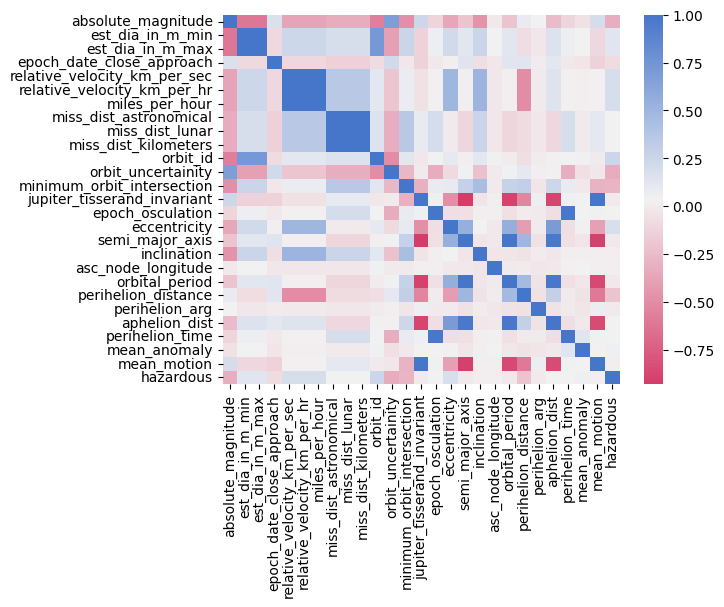

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
correlations = df_asteroid.corr()

# Get the feature names
feature_names = correlations.index.tolist()

sns.heatmap(correlations, cmap=cmap, xticklabels=feature_names, yticklabels=feature_names)
plt.show()

General Correlation Observations:

*   As perihelion distance, minimum orbit intersection, and orbit uncertainity decreases, its risk for hazad increases
*   mean motion and aphelion distance have a strong negative correlation
*   Jupiter tisserand invariant has a strong positve correlation with mean motion
*   Many more feature correlations can be seen above





View feature correlations compared to our target variable

Text(0.5, 1.0, 'Hazardous Feature Correlation')

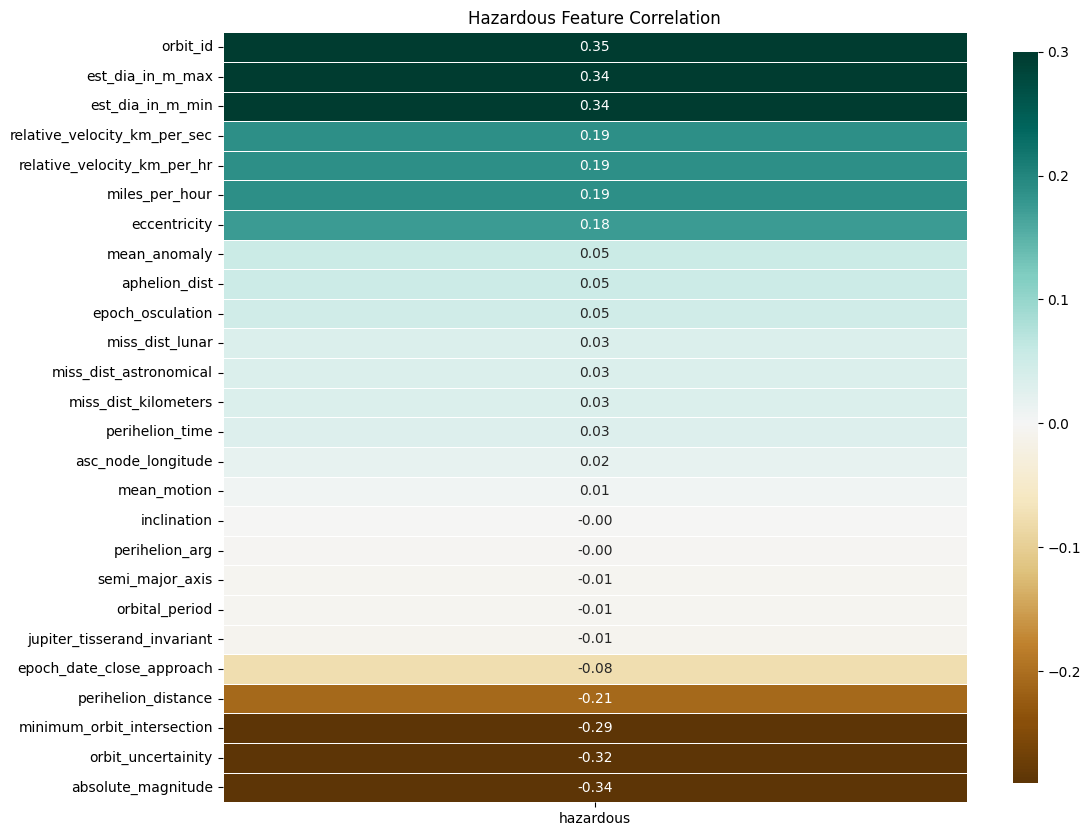

In [ ]:

corr_plot = klib.corr_plot(df_asteroid, target='hazardous', method='spearman')

# Adding title directly to the plot
corr_plot.set_title("Hazardous Feature Correlation")




We can see above that the 3 most negatively correlated features are 'absolute_magnitude', 'orbit_uncertainity', and 'minimum_orbit_intersection' while the 3 most positively correlated features are 'orbit_id' and "est_diameter min/max'

Below I'm doing some quick looking at our target feature

Text(0.5, 1.0, 'Hazardous Label Distribution')

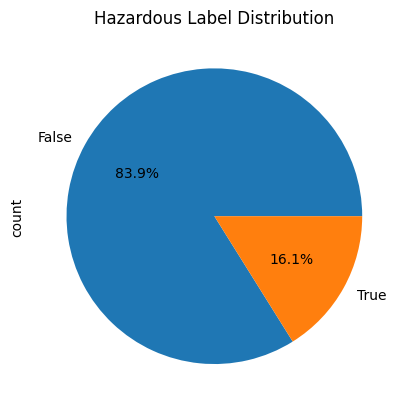

In [ ]:
#check distribution of 'Hazardous' feature with pie graph
grap =df_asteroid['hazardous'].value_counts().plot(kind='pie', autopct='%1.1f%%')
grap.set_title('Hazardous Label Distribution')



Display value counts and hazardous label distribution for each feature.

<ipython-input-34-784d7e40dbed>:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()  # Adjust subplot spacing
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


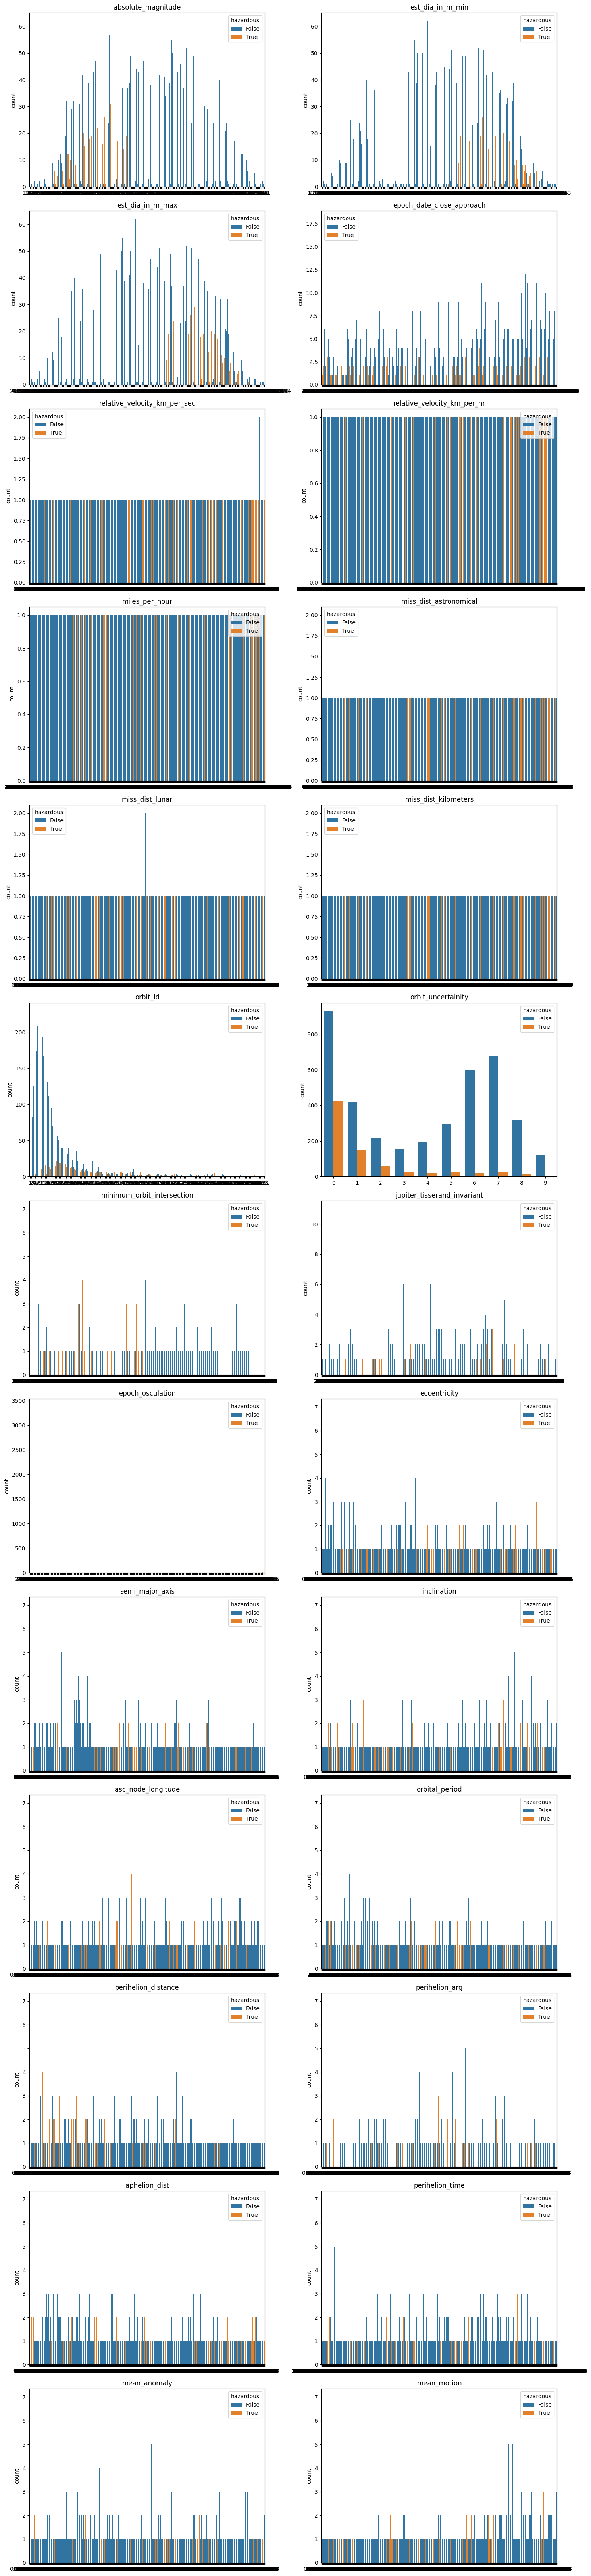

In [ ]:
features = list(df_asteroid.columns)
features.remove('hazardous')

num_features = len(features)
num_rows = (num_features + 1) // 2  # Adjust rows for odd number of features

plt.figure(figsize=(15, 5*num_rows))  # Adjust figure size

for i, feature in enumerate(features):
    plt.subplot(num_rows, 2, i+1)  # Adjust subplot arrangement
    sns.countplot(x=feature, hue='hazardous', data=df_asteroid)
    plt.title(feature)
    plt.xlabel("")  # Remove x-axis label for better readability

plt.tight_layout()  # Adjust subplot spacing
plt.show()

Above we investigate the distribution of hazardous labels by value for each feature in the dataset. This just gives us a better understanding of each features relation with our target variable.

Declare our used models

In [ ]:
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
svc = SVC()
xgb = XGBClassifier()
models = [rfc, abc, gbc, etc, svc, xgb]
names = ['Random Forest', 'AdaBoost', 'Gradient Boost', 'Extra Trees', 'SVC', 'XGBoost']

# Normalization

We will create a normalized copy of our dataset so we can run it through our models normalized and non-normalized and compare the results

In [ ]:
from sklearn.preprocessing import StandardScaler #will use sklearns standard scaler to normalize our data

# Separate features from the target variable
X = df_asteroid.drop(columns=['hazardous'])
y = df_asteroid['hazardous']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
X_normalized = scaler.fit_transform(X)

# Create a new DataFrame with the normalized features
df_asteroid_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Add the target variable back to the DataFrame
df_asteroid_normalized['hazardous'] = y


In [ ]:
df_asteroid_normalized.head()

,absolute_magnitude,est_dia_in_m_min,est_dia_in_m_max,epoch_date_close_approach,relative_velocity_km_per_sec,relative_velocity_km_per_hr,miles_per_hour,miss_dist_astronomical,miss_dist_lunar,miss_dist_kilometers,...,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion,hazardous
0,-0.231042,-0.209411,-0.209411,-1.973087,-1.077139,-1.077139,-1.077139,1.116075,1.116075,1.116075,...,-0.671954,1.377191,-0.070049,-0.021172,-1.223886,0.019571,0.459190,0.778393,-0.431100,True
1,-0.334825,-0.158406,-0.158406,-1.973087,0.568146,0.568146,0.568146,0.865921,0.865921,0.865921,...,1.375315,-0.343193,-0.565393,-0.393267,1.247897,-0.514802,0.070818,-0.069093,0.312582,False
2,-0.680766,0.072789,0.072789,-1.970035,-0.874892,-0.874892,-0.874892,-1.411843,-1.411843,-1.411843,...,-0.835467,0.845573,0.021563,0.567722,0.623011,-0.021323,0.415579,1.039404,-0.522114,True
3,1.775417,-0.529864,-0.529864,-1.966982,-0.383539,-0.383539,-0.383539,0.195800,0.195800,0.195800,...,-0.500038,-1.113477,-0.327568,0.704524,-1.596341,-0.482690,0.184540,-1.045928,-0.110818,False
4,-0.231042,-0.209411,-0.209411,-1.966982,-0.566337,-0.566337,-0.566337,1.036159,1.036159,1.036159,...,0.312713,-0.847599,-0.377402,0.637530,-0.248001,-0.529316,0.091457,-0.428186,-0.034580,True


# Model

Below I am constructing a method to run all models and generate evaluations in HTML format

In [ ]:
import matplotlib.pyplot as plt

def predicting_asteroid(df, models, names): #define prediction function
  display(HTML('<h1>Predicting Asteroids</h1>')) #display HTML
  X = df.drop('hazardous', axis=1) #create our x values
  y = df['hazardous'] #create our y values
  train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42) # do a train - test split
  def training(model, name, axes): #define training function
    model.fit(train_X, train_y) #fit the model
    pred = model.predict(test_X) #predict the values
    score = accuracy_score(test_y, pred) #obtain score
    report = classification_report(test_y, pred) #obtain report
    cm = confusion_matrix(test_y, pred) #obtain CM
    sns.heatmap(cm, annot=True, ax=axes) #optain heatmap
    axes.set_title("{}: {}%".format(name, round(score*100, 2))) #display formatting
    return score*100, report #returned results

  display(HTML('<h1>Training and evaluation of Asteroid hazard prediction</h1>')) #display HTML

  #create plots
  fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,7)) #create plots
  index = 0
  scores, reports = [], dict()
  for i in range(2):
        for j in range(3):
            score, report = training(models[index], names[index], axes[i][j])
            reports[names[index]] = report
            index += 1
            scores += [score]
  plt.tight_layout()
  plt.show()

  dt = pd.DataFrame({"scores": scores}, index=names)
  dt = dt.sort_values("scores", ascending=False)
  dt["scores"] = round(dt["scores"], 2)
  fig, axes = plt.subplots()
  sns.barplot(x=dt.index, y=dt.iloc[:, 0], ax=axes)
  for container in axes.containers:
      axes.bar_label(container)
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
  axes.set_xlabel("Model Names")
  axes.set_title("Model Accuracy")
  plt.show()

  for i in dt.index:
        print("*"*30)
        print(i)
        print(reports[i])
        print("\n\n")

Show Non-Normalized Predictions

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


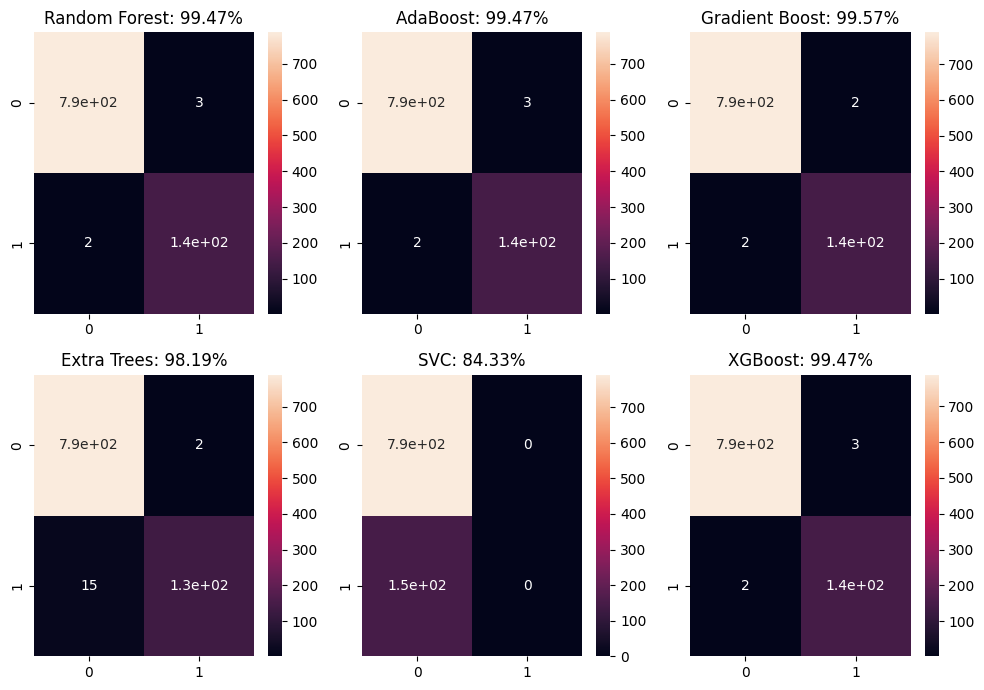

<ipython-input-37-6f625fe01bab>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


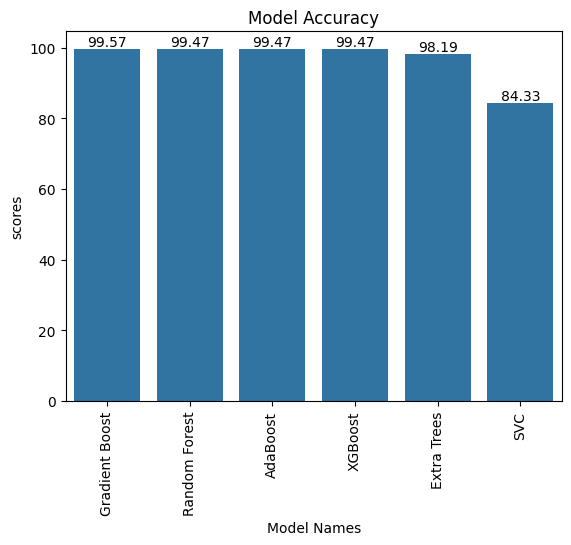

******************************
Gradient Boost
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       791
         1.0       0.99      0.99      0.99       147

    accuracy                           1.00       938
   macro avg       0.99      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938




******************************
Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       791
         1.0       0.98      0.99      0.98       147

    accuracy                           0.99       938
   macro avg       0.99      0.99      0.99       938
weighted avg       0.99      0.99      0.99       938




******************************
AdaBoost
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       791
         1.0       0.98      0.99      0.98       147

    accuracy                           0.99  

In [ ]:
predicting_asteroid(df_asteroid, models, names)

Show Normalized Predictions

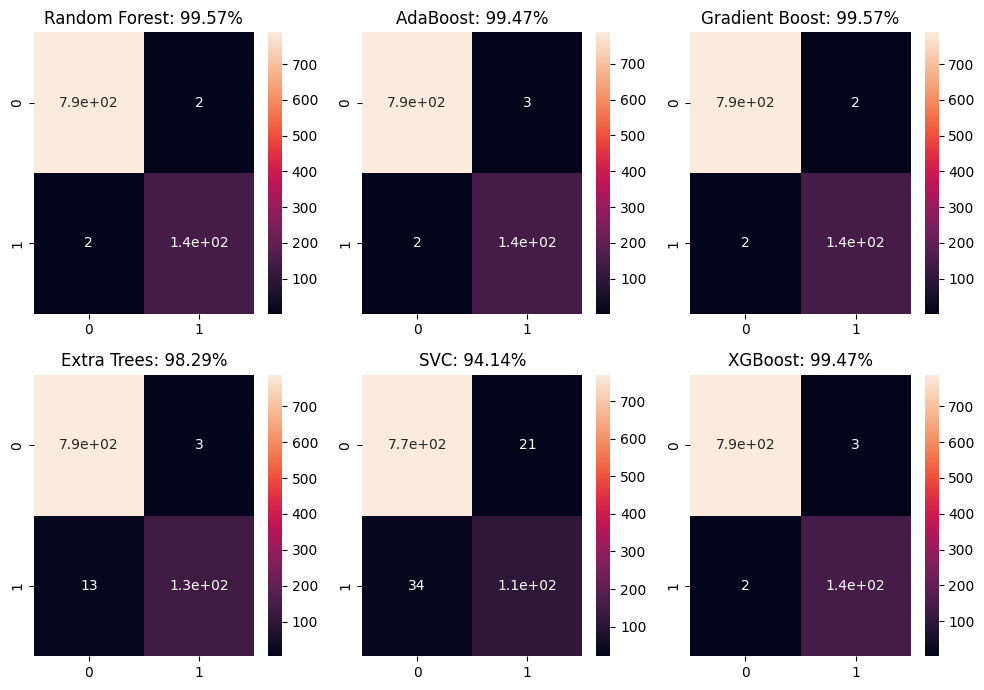

<ipython-input-37-6f625fe01bab>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


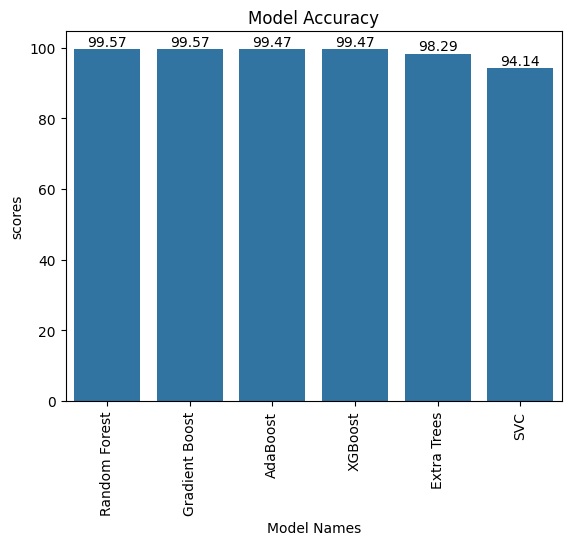

******************************
Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       791
         1.0       0.99      0.99      0.99       147

    accuracy                           1.00       938
   macro avg       0.99      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938




******************************
Gradient Boost
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       791
         1.0       0.99      0.99      0.99       147

    accuracy                           1.00       938
   macro avg       0.99      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938




******************************
AdaBoost
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       791
         1.0       0.98      0.99      0.98       147

    accuracy                           0.99  

In [ ]:
predicting_asteroid(df_asteroid_normalized, models, names)

Observations:

We can see by Normalizing the data, we see a massive increase in accuracy from the SVC model as this model works better with normalized data. All other algortihms perform roughtly the same, with high accuracy.

Below I run the non-normalized data through another RF to display the Random Forrest algorithms feature importance

In [ ]:

#train random forest classifier
X = df_asteroid.drop('hazardous', axis=1)
y = df_asteroid['hazardous']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_X, train_y)

#use rf model to display the most impactful features for the target variable
feature_importances = pd.DataFrame(rf.feature_importances_, index=train_X.columns, columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False)
feature_importances.head(10)

,importance
absolute_magnitude,0.096641
est_dia_in_m_min,0.110414
est_dia_in_m_max,0.110250
epoch_date_close_approach,0.003284
relative_velocity_km_per_sec,0.008480
relative_velocity_km_per_hr,0.005955
miles_per_hour,0.008660
miss_dist_astronomical,0.011513
miss_dist_lunar,0.013777
miss_dist_kilometers,0.009953


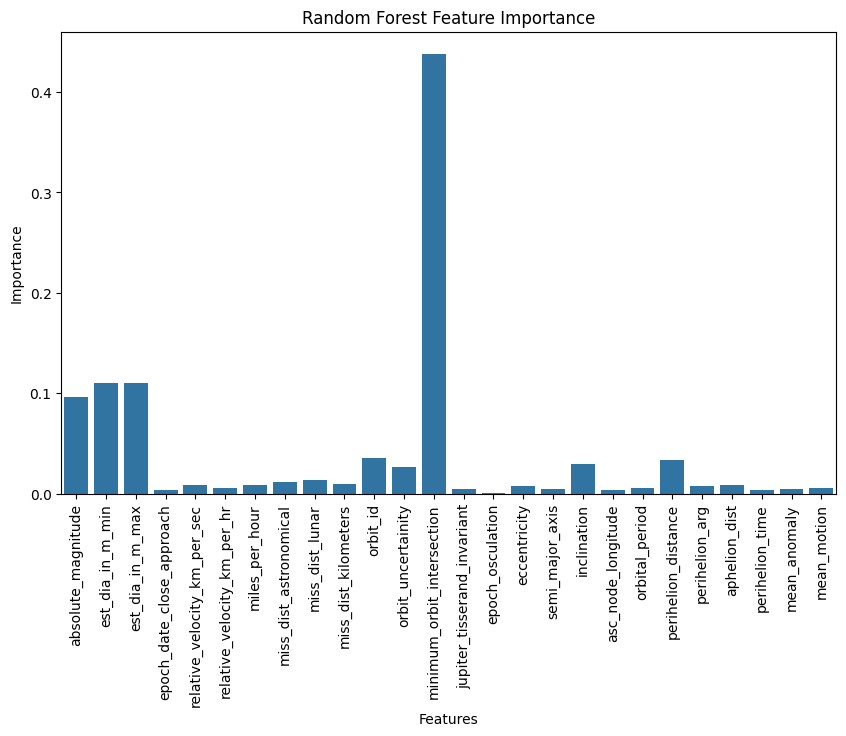

In [ ]:
import matplotlib.pyplot as plt #for plots
#graph features by importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y='importance', data=feature_importances)
plt.xticks(rotation=90)
#set title
plt.title('Random Forest Feature Importance')
#set labels
plt.xlabel('Features')
plt.ylabel('Importance')

plt.show()